## Race/Ethnicity Diversity and Retention Rate Analysis 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Load the data

In [2]:
data = pd.read_csv('data/Most-Recent-Cohorts-Institution-filtered.csv')
data = data.drop('Unnamed: 0', axis=1)
data.head()

,UNITID,INSTNM,CITY,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,CCUGPROF,...,MD_FAMINC,FAMINC_IND,MN_EARN_WNE_P10,UGDS_MEN,UGDS_WOMEN,GRADS,RET_FT4_POOLED,RET_FTL4_POOLED,PRGMOFR,ADMCON7
0,100654,Alabama A & M University,Normal,4,1,1,5,12.0,NaN,10.0,...,23553,10340.346032,35500,0.3978,0.6022,884.0,0.5533,NaN,NaN,1.0
1,100663,University of Alabama at Birmingham,Birmingham,4,1,1,5,12.0,NaN,9.0,...,34489,30607.18029,48400,0.3816,0.6184,8685.0,0.8477,NaN,NaN,1.0
2,100690,Amridge University,Montgomery,4,2,1,5,12.0,NaN,5.0,...,15033.5,20596.158491,47600,0.2886,0.7114,477.0,0.5000,NaN,NaN,NaN
3,100706,University of Alabama in Huntsville,Huntsville,4,1,1,5,12.0,NaN,15.0,...,44787,27941.821963,52000,0.5891,0.4109,1972.0,0.8234,NaN,NaN,1.0
4,100724,Alabama State University,Montgomery,4,1,1,5,12.0,NaN,10.0,...,22080.5,8551.802974,30600,0.3605,0.6395,458.0,0.6164,NaN,NaN,1.0


### Basci Information

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6681 entries, 0 to 6680
Data columns (total 76 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UNITID             6681 non-null   int64  
 1   INSTNM             6681 non-null   object 
 2   CITY               6681 non-null   object 
 3   HIGHDEG            6681 non-null   int64  
 4   CONTROL            6681 non-null   int64  
 5   ST_FIPS            6681 non-null   int64  
 6   REGION             6681 non-null   int64  
 7   LOCALE             6127 non-null   float64
 8   LOCALE2            0 non-null      float64
 9   CCUGPROF           6127 non-null   float64
 10  CCSIZSET           6127 non-null   float64
 11  RELAFFIL           897 non-null    float64
 12  ADM_RATE           1962 non-null   float64
 13  SAT_AVG            1139 non-null   float64
 14  UG                 0 non-null      float64
 15  UGDS_WHITE         5840 non-null   float64
 16  UGDS_BLACK         5840 

**The columns related to race/ethnicity in the dataset are:***

* UGDS_WHITE

* UGDS_BLACK

* UGDS_HISP

* UGDS_ASIAN

* UGDS_AIAN

* UGDS_NHPI

* UGDS_2MOR

* UGDS_NRA

* UGDS_UNKN

* UGDS_WHITENH

* UGDS_BLACKNH

* UGDS_API

* UGDS_AIANOLD

* UGDS_HISPOLD

* UG_NRA

* UG_UNKN

* UG_WHITENH

* UG_BLACKNH

* UG_API

* UG_AIANOLD

* UG_HISPOLD

From the dataset summary information above, we can see that the following columns have all nulll values: **'UGDS_WHITENH', 'UGDS_BLACKNH', 'UGDS_API', 'UGDS_AIANOLD', 'UGDS_HISPOLD', 'UG_NRA', 'UG_UNKN', 'UG_WHITENH', 'UG_BLACKNH', 'UG_API', 'UG_AIANOLD', 'UG_HISPOLD'**

These columns with all null values are typically not useful for analysis and can be removed from the DataFrame.

In [4]:
race_data = data[['RET_FT4', 'RET_FTL4', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN',
                   'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN']]
race_data.head()

,RET_FT4,RET_FTL4,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
0,0.5403,NaN,0.0159,0.9022,0.0116,0.0012,0.0028,0.0008,0.0143,0.0073,0.0440
1,0.8640,NaN,0.5496,0.2401,0.0610,0.0704,0.0024,0.0004,0.0469,0.0232,0.0059
2,0.5000,NaN,0.2550,0.6913,0.0268,0.0034,0.0000,0.0000,0.0000,0.0000,0.0235
3,0.8180,NaN,0.7173,0.0907,0.0599,0.0354,0.0083,0.0010,0.0431,0.0190,0.0252
4,0.6202,NaN,0.0167,0.9265,0.0130,0.0019,0.0017,0.0017,0.0119,0.0155,0.0111


These columns provide information on the racial and ethnic diversity of undergraduate, degree-seeking students in a particular institutions. 

* white (UGDS_WHITE)

* black (UGDS_BLACK)

* Hispanic (UGDS_HISP)

* Asian (UGDS_ASIAN)

* American Indian/Alaska Native (UGDS_AIAN)

* Native Hawaiian/Pacific Islander (UGDS_NHPI)

* two or more races (UGDS_2MOR)

* non-resident aliens (UGDS_NRA)

* unknown (UGDS_UNKN)

In [5]:
race_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6681 entries, 0 to 6680
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RET_FT4     2080 non-null   float64
 1   RET_FTL4    3098 non-null   float64
 2   UGDS_WHITE  5840 non-null   float64
 3   UGDS_BLACK  5840 non-null   float64
 4   UGDS_HISP   5840 non-null   float64
 5   UGDS_ASIAN  5840 non-null   float64
 6   UGDS_AIAN   5840 non-null   float64
 7   UGDS_NHPI   5840 non-null   float64
 8   UGDS_2MOR   5840 non-null   float64
 9   UGDS_NRA    5840 non-null   float64
 10  UGDS_UNKN   5840 non-null   float64
dtypes: float64(11)
memory usage: 574.3 KB


### Investigating the missing values

In [6]:
race_data.isnull().sum()

RET_FT4       4601
RET_FTL4      3583
UGDS_WHITE     841
UGDS_BLACK     841
UGDS_HISP      841
UGDS_ASIAN     841
UGDS_AIAN      841
UGDS_NHPI      841
UGDS_2MOR      841
UGDS_NRA       841
UGDS_UNKN      841
dtype: int64

In [7]:
missing_rows = race_data[race_data.iloc[:, 2:].isna().all(axis=1)]
missing_rows

,RET_FT4,RET_FTL4,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
race_data = race_data.drop(missing_rows.index.values, axis=0)
race_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5840 entries, 0 to 6126
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RET_FT4     2080 non-null   float64
 1   RET_FTL4    3098 non-null   float64
 2   UGDS_WHITE  5840 non-null   float64
 3   UGDS_BLACK  5840 non-null   float64
 4   UGDS_HISP   5840 non-null   float64
 5   UGDS_ASIAN  5840 non-null   float64
 6   UGDS_AIAN   5840 non-null   float64
 7   UGDS_NHPI   5840 non-null   float64
 8   UGDS_2MOR   5840 non-null   float64
 9   UGDS_NRA    5840 non-null   float64
 10  UGDS_UNKN   5840 non-null   float64
dtypes: float64(11)
memory usage: 547.5 KB


In [9]:
race_data.isnull().sum()

RET_FT4       3760
RET_FTL4      2742
UGDS_WHITE       0
UGDS_BLACK       0
UGDS_HISP        0
UGDS_ASIAN       0
UGDS_AIAN        0
UGDS_NHPI        0
UGDS_2MOR        0
UGDS_NRA         0
UGDS_UNKN        0
dtype: int64

In [10]:
race_data.head()

,RET_FT4,RET_FTL4,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
0,0.5403,NaN,0.0159,0.9022,0.0116,0.0012,0.0028,0.0008,0.0143,0.0073,0.0440
1,0.8640,NaN,0.5496,0.2401,0.0610,0.0704,0.0024,0.0004,0.0469,0.0232,0.0059
2,0.5000,NaN,0.2550,0.6913,0.0268,0.0034,0.0000,0.0000,0.0000,0.0000,0.0235
3,0.8180,NaN,0.7173,0.0907,0.0599,0.0354,0.0083,0.0010,0.0431,0.0190,0.0252
4,0.6202,NaN,0.0167,0.9265,0.0130,0.0019,0.0017,0.0017,0.0119,0.0155,0.0111


In [11]:
race_data.tail()

,RET_FT4,RET_FTL4,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
6122,NaN,NaN,0.7500,0.0,0.1875,0.0000,0.0,0.0000,0.0000,0.0,0.0625
6123,NaN,NaN,0.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000
6124,NaN,NaN,0.5882,0.0,0.0588,0.0588,0.0,0.1176,0.1176,0.0,0.0588
6125,NaN,NaN,1.0000,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0000
6126,NaN,1.0,0.5714,0.0,0.2857,0.1429,0.0,0.0000,0.0000,0.0,0.0000


#### Removing rows with missing values in both columns `RET_FT4` and `RET_FTL4`

In [12]:
missing_rows = race_data[race_data['RET_FT4'].isna() & race_data['RET_FTL4'].isna()]
missing_rows

,RET_FT4,RET_FTL4,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
7,NaN,NaN,0.7596,0.1305,0.0369,0.0065,0.0126,0.0011,0.0247,0.0008,0.0274
53,NaN,NaN,0.5538,0.1846,0.1231,0.0077,0.0000,0.0000,0.0846,0.0000,0.0462
61,NaN,NaN,0.3132,0.0415,0.1972,0.0189,0.0830,0.0486,0.1363,0.0005,0.1608
90,NaN,NaN,0.5013,0.0491,0.3488,0.0258,0.0181,0.0000,0.0052,0.0000,0.0517
93,NaN,NaN,0.3660,0.0685,0.4046,0.0452,0.0188,0.0046,0.0832,0.0010,0.0081
...,...,...,...,...,...,...,...,...,...,...,...
6120,NaN,NaN,0.1269,0.1866,0.1567,0.0821,0.0000,0.0149,0.4328,0.0000,0.0000
6122,NaN,NaN,0.7500,0.0000,0.1875,0.0000,0.0000,0.0000,0.0000,0.0000,0.0625
6123,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
6124,NaN,NaN,0.5882,0.0000,0.0588,0.0588,0.0000,0.1176,0.1176,0.0000,0.0588


In [13]:
race_data = race_data.drop(missing_rows.index.values, axis=0)
race_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5178 entries, 0 to 6126
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RET_FT4     2080 non-null   float64
 1   RET_FTL4    3098 non-null   float64
 2   UGDS_WHITE  5178 non-null   float64
 3   UGDS_BLACK  5178 non-null   float64
 4   UGDS_HISP   5178 non-null   float64
 5   UGDS_ASIAN  5178 non-null   float64
 6   UGDS_AIAN   5178 non-null   float64
 7   UGDS_NHPI   5178 non-null   float64
 8   UGDS_2MOR   5178 non-null   float64
 9   UGDS_NRA    5178 non-null   float64
 10  UGDS_UNKN   5178 non-null   float64
dtypes: float64(11)
memory usage: 485.4 KB


## Measuring Racial and Ethnic Diversity

In this project we use the **Simpson's Diversity Index** to describe the Racial and Ethnic diversity of professions schools in the United States. 

$$1 - \sum_{i=1}^{n} p_i^2$$ 

In [14]:
race_data['diversity_index'] = 1 - race_data.iloc[:, 2:].apply(lambda row: row**2, axis=1).sum(axis=1)
race_data.head()

,RET_FT4,RET_FTL4,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,diversity_index
0,0.5403,NaN,0.0159,0.9022,0.0116,0.0012,0.0028,0.0008,0.0143,0.0073,0.0440,0.183444
1,0.8640,NaN,0.5496,0.2401,0.0610,0.0704,0.0024,0.0004,0.0469,0.0232,0.0059,0.628836
2,0.5000,NaN,0.2550,0.6913,0.0268,0.0034,0.0000,0.0000,0.0000,0.0000,0.0235,0.455797
3,0.8180,NaN,0.7173,0.0907,0.0599,0.0354,0.0083,0.0010,0.0431,0.0190,0.0252,0.469490
4,0.6202,NaN,0.0167,0.9265,0.0130,0.0019,0.0017,0.0017,0.0119,0.0155,0.0111,0.140635


In [15]:
FT4_institutions = race_data[race_data['RET_FT4'].notnull()][['RET_FT4', 'diversity_index']]
FTL4_institutions = race_data[race_data['RET_FTL4'].notnull()][['RET_FTL4', 'diversity_index']]

In [16]:
FT4_institutions.head()

,RET_FT4,diversity_index
0,0.5403,0.183444
1,0.8640,0.628836
2,0.5000,0.455797
3,0.8180,0.469490
4,0.6202,0.140635


In [17]:
FTL4_institutions.head()

,RET_FTL4,diversity_index
6,0.5915,0.430426
11,0.5538,0.661073
13,0.5961,0.588972
14,0.5449,0.527717
16,0.5357,0.478832


### Descriptive Statisics Summary for four-year and less-than-four-year institutions

In [18]:
# four-year institutions
FT4_institutions['RET_FT4'].mean()

0.730971298076923

In [19]:
FT4_institutions['diversity_index'].mean()

0.5035307974807692

In [20]:
# less-than-four-year institutions
FTL4_institutions['RET_FTL4'].mean()

0.6909051969012266

In [21]:
FTL4_institutions['diversity_index'].mean()

0.47995730161071665

### Relationship between Retension Rate and Diversity Index at four-year institutions 

When you have two massive continuous data and you want to visualize their relationship, you can use a scatter plot. Scatter plots are useful for visualizing the relationship between two continuous variables. Each data point is plotted as a point on the graph, with one variable on the x-axis and the other on the y-axis.

However, if you have a large number of data points, a scatter plot can become overcrowded and difficult to interpret. In such cases, you can use a 2D density plot. These plots provide a way to visualize the distribution of the data while reducing the clutter caused by overlapping points in a scatter plot. A 2D density plot creates a smoothed representation of the data by estimating the density of points in different regions of the plot.

* $H_0:$ There is no relationship between the retension rate and diversity index at four-year institutions. 

* $H_1:$ There is no relationship between the retension rate and diversity index at four-year institutions. 

In [22]:
corr, p_value = stats.pearsonr(FT4_institutions['diversity_index'], FT4_institutions['RET_FT4'])
print(corr, p_value)

-0.012020871881703171 0.583742479083747


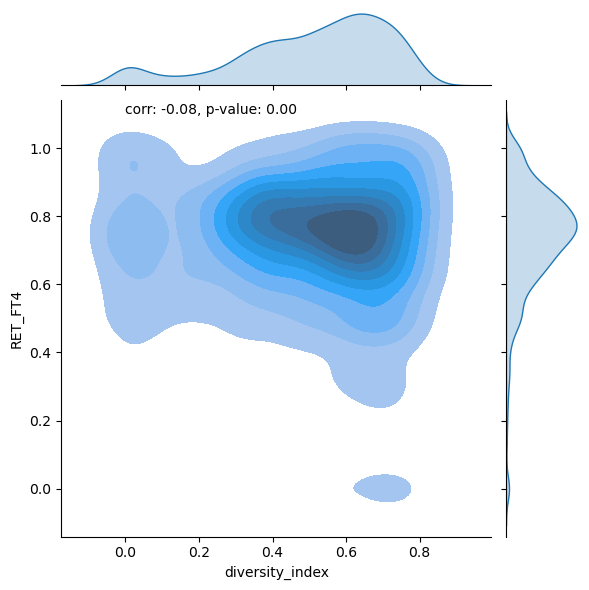

In [30]:
f = sns.jointplot(data=FT4_institutions, x='diversity_index', y='RET_FT4', kind='kde', fill='b')
f.ax_joint.annotate(f'corr: {corr:.2f}, p-value: {p_value:.2f}', xy=(0,1.1))
plt.savefig('figures/RET_FT4_diversity.png');

**The p-value is around 0.58, which is very large. This means that we can conclude that there is no relationship between retention rate and diversity index at four-year institutions.**

### Relationship between Retension Rate and Diversity Index at less-than-four-year institutions

* $H_0:$ There is no relationship between the retension rate and diversity index at less-than-four-year institutions. 

* $H_1:$ There is no relationship between the retension rate and diversity index at less-than-four-year institutions. 

In [24]:
corr, p_value = stats.pearsonr(FTL4_institutions['diversity_index'], FTL4_institutions['RET_FTL4'])
print(corr, p_value)

-0.08259689032835084 4.15791895176101e-06


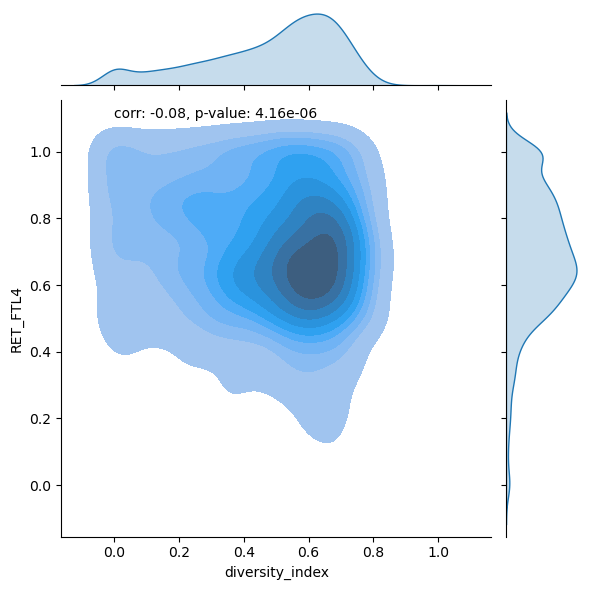

In [31]:
g = sns.jointplot(data=FTL4_institutions, x='diversity_index', y='RET_FTL4', kind='kde', fill='b')
g.ax_joint.annotate(f'corr: {corr:.2f}, p-value: {p_value:.2e}', xy=(0,1.1))
plt.savefig('figures/RET_FTL4_diversity.png');

**The p-value is very small. This means that we can conclude that there is a relationship between retention rate and diversity index at less-than-four-year institutions.**